<a href="https://colab.research.google.com/github/Reenook/Flight_Price_Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We can get rid of Unnamed and flight no. just from looking
at the initial dataset

In [2]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Checking the total values in these columns to determine whether we need to one hot encode them or not based on how many values there are

In [3]:
df.value_counts('airline')

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [4]:
df.value_counts('source_city')

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [5]:
df.value_counts('destination_city')

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [6]:
df.value_counts('departure_time')

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [7]:
df.value_counts('arrival_time')

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [8]:
df.value_counts('class') # we only have two values here so we can binary encode it

,count
class,
Economy,206666
Business,93487


In [9]:
df.value_counts('stops') #numerical encoding here 1-2

,count
stops,
one,250863
zero,36004
two_or_more,13286


# **Preprocessing**

In [10]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Drop unnecessary columns

In [11]:
df=df.drop('flight', axis=1)

In [12]:
df=df.drop('Unnamed: 0', axis=1)

In [13]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Convert to binary for class column

In [14]:
df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [15]:
df.stops=pd.factorize(df.stops)[0]

One hot encoding categorical columns and dropping the old columns after we encode them

In [16]:
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest', dtype=int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop('departure_time', axis=1)


In [17]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# **Training Regression Model**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Split the data X will be all values except target val price and y will be just price

In [19]:
X=df.drop('price',axis=1)
y=df.price

In [20]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [21]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


80% of the data is gonna be used for training and 20% is gonna be used for testing

In [22]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
regressor= RandomForestRegressor(n_jobs=-1)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [24]:
regressor.score(X_test,y_test)

0.9852334783314803

In [27]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred=regressor.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1075.8697929339685
Mean Squared Error: 7598201.491931452
Root Mean Squared Error: 2756.4835373953265
R2 Score: 0.9852334783314803


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

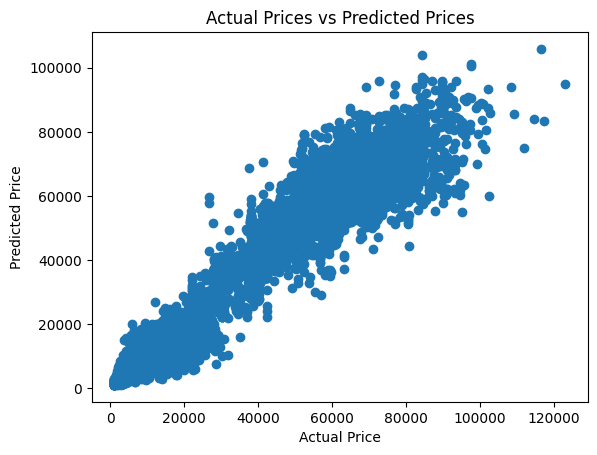

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

To see the most important features of the dataset

In [29]:
importances=dict(zip(regressor.feature_names_in_, regressor.feature_importances_))
sorted_importances=sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8799947384639417),
 ('duration', 0.057416066573383384),
 ('days_left', 0.018656339660516327),
 ('airline_Vistara', 0.0052511408567743134),
 ('airline_Air_India', 0.004694567717825571),
 ('source_Delhi', 0.0035910766118876524),
 ('dest_Delhi', 0.003189613889017042),
 ('source_Mumbai', 0.0022485325667028675),
 ('dest_Kolkata', 0.0018599723104378175),
 ('source_Kolkata', 0.0018537709680679323),
 ('stops', 0.0018282625671745712),
 ('dest_Mumbai', 0.0018212078685156175),
 ('arrival_Evening', 0.0017146969050326499),
 ('dest_Hyderabad', 0.0015412467367626657),
 ('dest_Bangalore', 0.0012978398350676754),
 ('source_Hyderabad', 0.0012200209311248626),
 ('arrival_Night', 0.0011615636688541507),
 ('departure_Evening', 0.0010932400459768559),
 ('source_Bangalore', 0.0010676827820043067),
 ('arrival_Afternoon', 0.0009667364770262758),
 ('dest_Chennai', 0.0009556924245726747),
 ('source_Chennai', 0.0009553264597477203),
 ('departure_Morning', 0.0008797129705494306),
 ('departure_Afternoo

# **Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
regressor=RandomForestRegressor(n_jobs=-1)
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto', 'sqrt']
}

grid_search=GridSearchCV(regressor,param_grid,cv=5)
best_params=grid_search.best_params_